# Chapter 2 - Spatial Raster Data in Python cont.


In [2]:
import numpy as np
x = np.linspace(-90, 90, 6)
y = np.linspace(90, -90, 6)
X, Y = np.meshgrid(x, y)
X

array([[-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.],
       [-90., -54., -18.,  18.,  54.,  90.]])

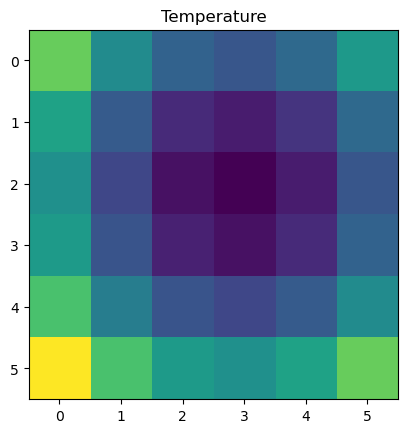

In [3]:
import matplotlib.pyplot as plt

Z1 =  np.abs(((X - 10) ** 2 + (Y - 10) ** 2) / 1 ** 2)
Z2 =  np.abs(((X + 10) ** 2 + (Y + 10) ** 2) / 2.5 ** 2)
Z =  (Z1 - Z2)

plt.imshow(Z)
plt.title("Temperature")
plt.show()

In [5]:
from rasterio.transform import Affine
import rasterio as rio

res = (x[-1] - x[0]) / 240.0
transform = Affine.translation(x[0] - res / 2, y[0] - res / 2) * Affine.scale(res, res)

# open in 'write' mode, unpack profile info to dst
with rio.open(
   "Data/new_raster.tif",
   "w",
   driver="GTiff",         # output file type
   height=Z.shape[0],      # shape of array
   width=Z.shape[1],
   count=1,                # number of bands
   dtype=Z.dtype,          # output datatype
   crs="+proj=latlong",    # CRS
   transform=transform,    # location and resolution of upper left cell
) as dst:
   # check for number of bands
   if dst.count == 1:
       # write single band
       dst.write(Z, 1)
   else:
       # write each band individually
       for band in range(len(Z)):
           # write data, band # (starting from 1)
           dst.write(Z[band], band + 1)

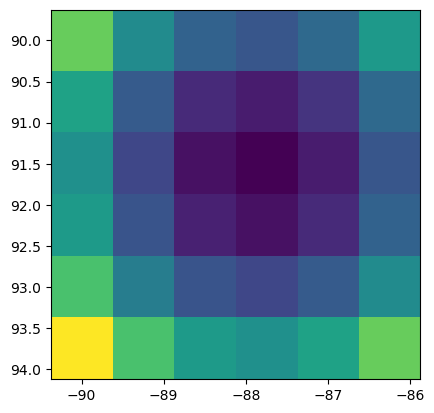

<AxesSubplot: >

In [6]:
from rasterio.plot import show
%matplotlib inline

# Open the file:
raster = rio.open("Data/new_raster.tif")

# Plot band 1
show((raster, 1))